In [43]:
import matplotlib as plt
import numpy as np
import pandas as pd
import csv

## I. Pre - Processing the dataset

In [44]:
# read the dataset
url = 'data_example.csv'
df = pd.read_csv(url)
print (df)
print(df['win'].sum())

        Unnamed: 0   date_time       event_name  level  \
0               40  2023-10-28       game_start      1   
1               41  2023-10-28       game_start      1   
2               42  2023-10-28       game_start      2   
3               43  2023-10-28       game_start      3   
4               44  2023-10-28       game_start      4   
...            ...         ...              ...    ...   
798327     7957940  2023-11-03  user_engagement      1   
798328     7957941  2023-11-01  user_engagement      1   
798329     7957942  2023-11-01  user_engagement      1   
798330     7957944  2023-11-01  user_engagement      1   
798331     7957952  2023-11-03  user_engagement      1   

                                        user  day_diff        day0 mode_game  \
0       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
1       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
2       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10

In [45]:
df.head()

,Unnamed: 0,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version
0,40,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0
1,41,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0
2,42,2023-10-28,game_start,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0
3,43,2023-10-28,game_start,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0
4,44,2023-10-28,game_start,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0




| **Label**           | **Meaning**                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `Unnamed: 0`        | Likely an index column automatically generated by a data processing tool.   |
| `date_time`         | The date and time when the event occurred.                                   |
| `event_name`        | The name of the event (`game_end`).                                    |
| `level`             | The level of the game at which the event occurred.                           |
| `user`              | A unique identifier for the user (likely a UUID).                            |
| `day_diff`          | The difference in days between the current event and the first recorded event (`day0`) for this user. |
| `day0`              | The date of the first recorded event for this user.                          |
| `mode_game`         | The mode of the game (`normal`).                                       |
| `win`               | A flag indicating whether the game was won (`1.0`) or lost (`0.0`), null is (`-1.0 `)         |
| `reason_to_die`     | The reason why the game ended or the player lost (e.g., `out_of_lives`).     |
| `quantity`          | An additional quantity related to the event (exact meaning depends on context, could be score, points, etc.). |
| `version`           | The version of the game when the event occurred.                             |



### 1. Check for Missing Values

In [46]:
df.isnull()
df.isnull().sum()

Unnamed: 0            0
date_time             0
event_name            0
level                 0
user                  0
day_diff              0
day0                  0
mode_game             0
win              554635
reason_to_die    680919
quantity              0
version               0
dtype: int64

In [47]:
df = df.dropna(subset=['win'])

print(df['win'])

8         0.0
9         1.0
10        1.0
11        1.0
12        1.0
         ... 
795896    1.0
795897    1.0
795898    1.0
795899    1.0
795900    1.0
Name: win, Length: 243697, dtype: float64


In [48]:
df.head()

,Unnamed: 0,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version
8,48,2023-10-28,game_end,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0.0,out_of_lives,31,1.6.0
9,49,2023-10-28,game_end,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,18,1.6.0
10,50,2023-10-28,game_end,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,10,1.6.0
11,51,2023-10-28,game_end,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,9,1.6.0
12,52,2023-10-28,game_end,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,8,1.6.0


In [49]:
pip install pandas scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
print(df.columns)

Index(['Unnamed: 0', 'date_time', 'event_name', 'level', 'user', 'day_diff',
       'day0', 'mode_game', 'win', 'reason_to_die', 'quantity', 'version'],
      dtype='object')


In [51]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [52]:
print(df.dtypes)

Unnamed: 0                int64
date_time        datetime64[ns]
event_name               object
level                     int64
user                     object
day_diff                float64
day0                     object
mode_game                object
win                     float64
reason_to_die            object
quantity                  int64
version                  object
dtype: object


In [53]:
#Using pandas describe() to find outliers
df.describe()

,Unnamed: 0,date_time,level,day_diff,win,quantity
count,2.436970e+05,243697,243697.000000,243697.000000,243697.000000,243697.000000
mean,2.451077e+06,2023-10-31 22:37:17.522825728,25.443284,1.110252,0.518201,47.377797
min,4.800000e+01,2023-10-28 00:00:00,1.000000,0.000000,0.000000,2.000000
25%,1.243079e+06,2023-10-30 00:00:00,5.000000,0.000000,0.000000,14.000000
50%,2.480019e+06,2023-11-01 00:00:00,12.000000,0.000000,1.000000,25.000000
75%,3.581332e+06,2023-11-03 00:00:00,23.000000,2.000000,1.000000,49.000000
max,7.501776e+06,2023-11-10 00:00:00,518.000000,7.000000,1.000000,15642.000000
std,1.382828e+06,NaN,44.866007,1.760307,0.499670,89.904959


In [54]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) 
threshold = 3
outliers = np.where(z_scores > threshold)
print("Outliers:")
print(df.iloc[outliers[0]])

Outliers:
        Unnamed: 0  date_time event_name  level  \
14              54 2023-10-30   game_end      5   
304           1099 2023-11-04   game_end      5   
305           1100 2023-11-04   game_end      6   
306           1101 2023-11-04   game_end      6   
720           2507 2023-10-29   game_end     18   
...            ...        ...        ...    ...   
795896     7501772 2023-11-09   game_end      4   
795897     7501773 2023-11-09   game_end      6   
795898     7501774 2023-11-09   game_end      5   
795899     7501775 2023-11-09   game_end      1   
795900     7501776 2023-11-09   game_end      3   

                                        user  day_diff        day0 mode_game  \
14      1cffd052-4616-4d29-bfd5-950e23b763d4       2.0  2023-10-28    normal   
304     803dad1b-dd48-47a4-a039-61e5e237cdb2       7.0  2023-10-28    normal   
305     803dad1b-dd48-47a4-a039-61e5e237cdb2       7.0  2023-10-28    normal   
306     803dad1b-dd48-47a4-a039-61e5e237cdb2       7.0  2

In [55]:
# Remove rows with outliers
df_cleaned = df[(z_scores < threshold).all(axis=1)]

In [56]:
print (df)

        Unnamed: 0  date_time event_name  level  \
8               48 2023-10-28   game_end      1   
9               49 2023-10-28   game_end      1   
10              50 2023-10-28   game_end      2   
11              51 2023-10-28   game_end      3   
12              52 2023-10-28   game_end      4   
...            ...        ...        ...    ...   
795896     7501772 2023-11-09   game_end      4   
795897     7501773 2023-11-09   game_end      6   
795898     7501774 2023-11-09   game_end      5   
795899     7501775 2023-11-09   game_end      1   
795900     7501776 2023-11-09   game_end      3   

                                        user  day_diff        day0 mode_game  \
8       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
9       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
10      1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
11      1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28 

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.drop('Unnamed: 0', axis=1)

,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version
8,2023-10-28,game_end,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0.0,out_of_lives,31,1.6.0
9,2023-10-28,game_end,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,18,1.6.0
10,2023-10-28,game_end,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,10,1.6.0
11,2023-10-28,game_end,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,9,1.6.0
12,2023-10-28,game_end,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,8,1.6.0
...,...,...,...,...,...,...,...,...,...,...,...
795896,2023-11-09,game_end,4,7e23a68c-9782-4104-8712-74add9caa0b4,6.0,2023-11-03,normal,1.0,NaN,19,1.6.0
795897,2023-11-09,game_end,6,7e23a68c-9782-4104-8712-74add9caa0b4,6.0,2023-11-03,normal,1.0,NaN,7,1.6.0
795898,2023-11-09,game_end,5,7e23a68c-9782-4104-8712-74add9caa0b4,6.0,2023-11-03,normal,1.0,NaN,12,1.6.0
795899,2023-11-09,game_end,1,7e23a68c-9782-4104-8712-74add9caa0b4,6.0,2023-11-03,normal,1.0,NaN,14,1.6.0


In [59]:
pip install graphviz


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [60]:
# Loại bỏ cột không cần thiết
df = df.iloc[:, 1:] 
df.drop(columns=['event_name' , 'date_time', 'day0', 'user', 'reason_to_die'], inplace=True)
df.to_csv('Data_changed.csv', index=False)

In [61]:
df.head()

,level,day_diff,mode_game,win,quantity,version
8,1,0.0,normal,0.0,31,1.6.0
9,1,0.0,normal,1.0,18,1.6.0
10,2,0.0,normal,1.0,10,1.6.0
11,3,0.0,normal,1.0,9,1.6.0
12,4,0.0,normal,1.0,8,1.6.0


## II. EDA

Columns in DataFrame: Index(['level', 'day_diff', 'mode_game', 'win', 'quantity', 'version'], dtype='object')


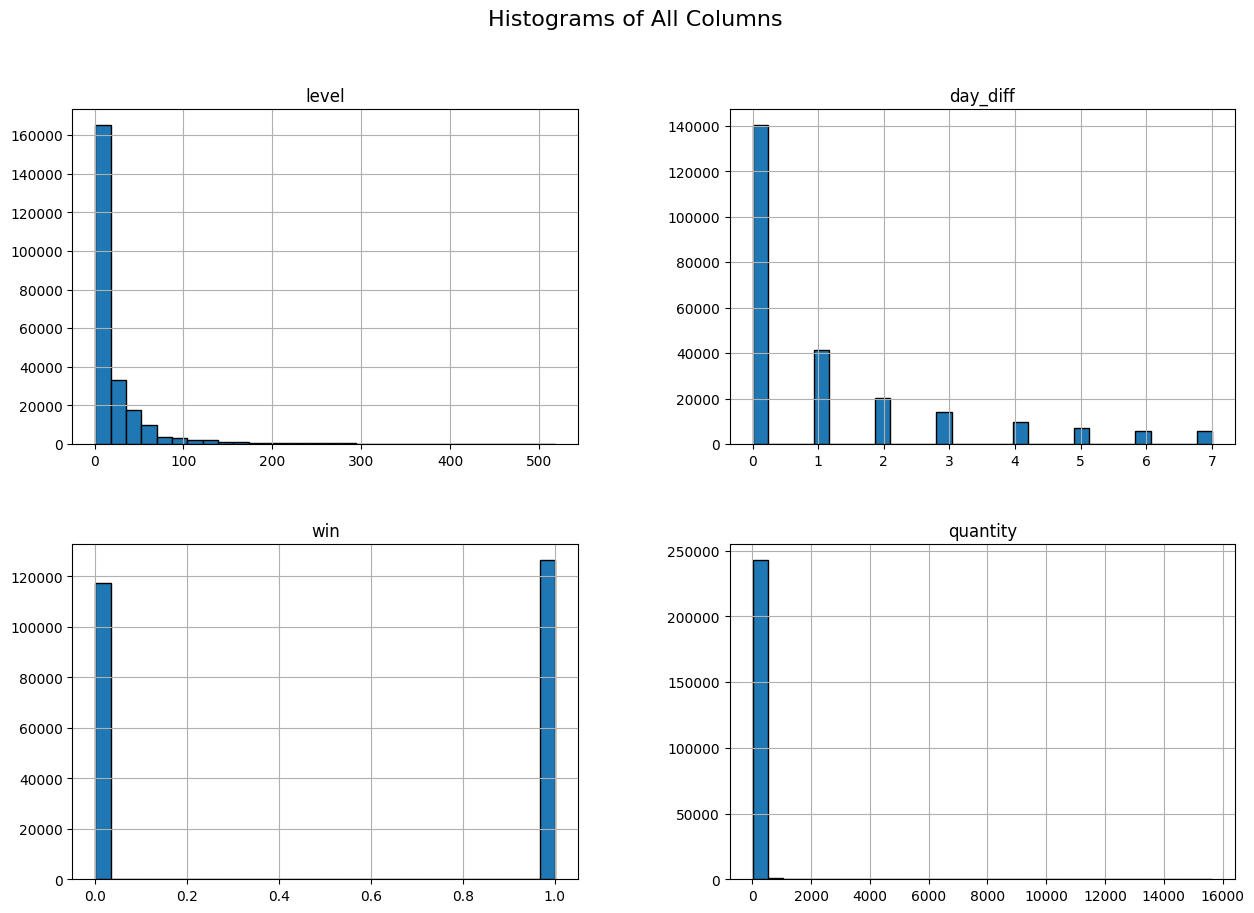

In [62]:
import matplotlib.pyplot as plt

# Kiểm tra lại tên các cột trong DataFrame
print("Columns in DataFrame:", df.columns)

# Vẽ biểu đồ histogram cho các cột
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Columns', fontsize=16)
plt.show()

**Distributions:**

* **level:** This distribution is highly right-skewed. Most values are concentrated at lower levels, with a long tail extending to the right, indicating some occurrences of very high levels.
* **day_diff:** This distribution is also right-skewed but more discrete. The most frequent values are 0 and 1, suggesting that many events happen on the same day or within a short timeframe. There's a gradual decrease in frequency as the day difference increases.
* **win:** This distribution is binary, with values concentrated at 0 and 1. This suggests it's a categorical variable representing a win (1) or loss (0).
* **quantity:** This distribution is also right-skewed, with most values clustered around the lower range and a long tail to the right, indicating some cases of very high quantities.

**Standard Deviations:**

The standard deviation cannot be directly calculated from the histograms alone. We would need the raw data to compute this. However, we can infer the following:

* **level:** The standard deviation is likely high due to the long tail and the wide spread of values.
* **day_diff:** The standard deviation is moderate, given that values are clustered around the low end but extend to 7.
* **win:** The standard deviation is low, as this is a binary variable.
* **quantity:** The standard deviation is likely high due to the long tail and the wide range of values.

**Outliers:**

Outliers are difficult to definitively identify from histograms alone. However, based on the long tails in the 'level' and 'quantity' distributions, it's highly probable that there are outliers in those columns.

**Correlations and Relationships:**

These histograms alone don't provide information about the correlation or relationship between columns. We'd need additional statistical measures or visualizations (like scatterplots or correlation matrices) to assess how these variables might be related to each other.

In [63]:
df.describe()

,level,day_diff,win,quantity
count,243697.000000,243697.000000,243697.000000,243697.000000
mean,25.443284,1.110252,0.518201,47.377797
std,44.866007,1.760307,0.499670,89.904959
min,1.000000,0.000000,0.000000,2.000000
25%,5.000000,0.000000,0.000000,14.000000
50%,12.000000,0.000000,1.000000,25.000000
75%,23.000000,2.000000,1.000000,49.000000
max,518.000000,7.000000,1.000000,15642.000000
